# Long-Short Term Memory (LSTM) Networks

Let's try a Long-Short Term Memory (LSTM) network on our data.

## Initial model

We import the necessary libraries and load the data.

In [1]:
import json
import numpy as np
from lstm import load_data, train_lstm, evaluate_lstm
import pandas as pd
import matplotlib.pyplot as plt

Then, we load the data.

In [2]:
with open('../data/NewsMTSC-dataset/train_preprocessed.jsonl', 'r') as f:
    train_data = [json.loads(line) for line in f]

with open('../data/NewsMTSC-dataset/devtest_mt_preprocessed.jsonl', 'r') as f:
    devtest_mt_data = [json.loads(line) for line in f]

with open('../data/NewsMTSC-dataset/devtest_rw_preprocessed.jsonl', 'r') as f:
    devtest_rw_data = [json.loads(line) for line in f]

print('train_data:', len(train_data))
print('devtest_mt_data:', len(devtest_mt_data))
print('devtest_rw_data:', len(devtest_rw_data))

print('train_data[0]:', train_data[0])
print('devtest_mt_data[0]:', devtest_mt_data[0])
print('devtest_rw_data[0]:', devtest_rw_data[0])

train_data: 8739
devtest_mt_data: 1476
devtest_rw_data: 1146
train_data[0]: {'gid': 'allsides_1000_401_25_Reality Leigh Winner_0_6', 'sentence_normalized': 'Winner wrote 30minute private meeting Republican lawmakers state policy director', 'polarity': 4.0}
devtest_mt_data[0]: {'gid': 'allsides_1002_402_12_former FBI director James B. Comey_51_56', 'sentence_normalized': 'While White House officials said days Comeys dismissal largely result memo written Deputy Attorney General Rod J Rosenstein criticizing FBI directors handling investigation Hillary Clintons use private email server secretary state Trump suggested NBC interview Russian investigation played role decision', 'polarity': 2.0}
devtest_rw_data[0]: {'gid': 'allsides_703_283_55_Mr. Trump_124_133', 'sentence_normalized': 'A group congressional Democrats said Wednesday ask Congress take rare step officially censuring Mr Trump', 'polarity': 2.0}


In [3]:
text_data, labels = load_data(train_data)
text_data_mt, labels_mt = load_data(devtest_mt_data)
text_data_rw, labels_rw = load_data(devtest_rw_data)

Then we train a baseline model. 

Device: cuda
Epoch 1, Loss: 1.0916058308016645
Epoch 2, Loss: 1.0836162649802048
Epoch 3, Loss: 1.0735021768695248
Epoch 4, Loss: 1.0579240537472885
Epoch 5, Loss: 1.0318483836459418
Epoch 6, Loss: 0.9925805397712402
Epoch 7, Loss: 0.939464314575613
Epoch 8, Loss: 0.8763525949342408
Epoch 9, Loss: 0.8092630999366732
Epoch 10, Loss: 0.7414121273225242
Epoch 11, Loss: 0.6786362485293924
Epoch 12, Loss: 0.6191910063698344
Epoch 13, Loss: 0.5651241228745801
Epoch 14, Loss: 0.5177273822091791
Epoch 15, Loss: 0.4764999788607994
Epoch 16, Loss: 0.4368342412159826
Epoch 17, Loss: 0.4034240991420989
Epoch 18, Loss: 0.3737852775158673
Epoch 19, Loss: 0.34606027282284996
Epoch 20, Loss: 0.3224794636242581


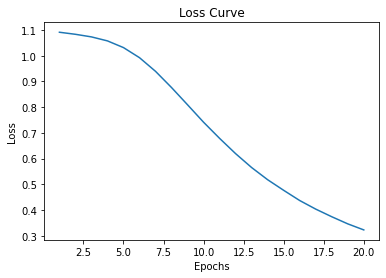

In [4]:
epochs = 20
hidden_dim = 128
num_layers = 3
learning_rate = 0.0001
model, vectorizer = train_lstm(text_data, labels, epochs, hidden_dim, num_layers, learning_rate)

Finally, we evaluate the model on the test datasets.

In [5]:
print("Train data classification report:")
accuracy, roc_auc, report = evaluate_lstm(model, vectorizer, text_data, labels)

print("Devtest MT data classification report:")
accuracy_mt, roc_auc_mt, report_mt = evaluate_lstm(model, vectorizer, text_data_mt, labels_mt)

print("Devtest RW data classification report:")
accuracy_rw, roc_auc_rw, report_rw = evaluate_lstm(model, vectorizer, text_data_rw, labels_rw)

Train data classification report:


Classification Report:
{'0': {'precision': 0.9170383586083853, 'recall': 0.9300361881785284, 'f1-score': 0.9234915406497979, 'support': 3316}, '1': {'precision': 0.9140040788579198, 'recall': 0.8880449141347424, 'f1-score': 0.9008375209380235, 'support': 3028}, '2': {'precision': 0.9170090386195563, 'recall': 0.9319415448851774, 'f1-score': 0.9244149927521226, 'support': 2395}, 'accuracy': 0.9160086966472136, 'macro avg': {'precision': 0.9160171586952871, 'recall': 0.916674215732816, 'f1-score': 0.9162480181133147, 'support': 8739}, 'weighted avg': {'precision': 0.9159789673213209, 'recall': 0.9160086966472136, 'f1-score': 0.9158951676205971, 'support': 8739}}
Accuracy: 0.9160
ROC-AUC: 0.9865
Devtest MT data classification report:
Classification Report:
{'0': {'precision': 0.5688405797101449, 'recall': 0.6514522821576764, 'f1-score': 0.6073500967117988, 'support': 482}, '1': {'precision': 0.6927536231884058, 'recall': 0.6390374331550802, 'f1-score': 0.6648122392211404, 'support': 748},

Let's what the report looks like.

In [6]:
report_rw

{'0': {'precision': 0.6469194312796208,
  'recall': 0.6363636363636364,
  'f1-score': 0.6415981198589894,
  'support': 429},
 '1': {'precision': 0.5643564356435643,
  'recall': 0.6263736263736264,
  'f1-score': 0.5937499999999999,
  'support': 455},
 '2': {'precision': 0.502283105022831,
  'recall': 0.4198473282442748,
  'f1-score': 0.45738045738045735,
  'support': 262},
 'accuracy': 0.5828970331588132,
 'macro avg': {'precision': 0.5711863239820053,
  'recall': 0.5608615303271791,
  'f1-score': 0.5642428590798155,
  'support': 1146},
 'weighted avg': {'precision': 0.5810722406219554,
  'recall': 0.5828970331588132,
  'f1-score': 0.5804847497846302,
  'support': 1146}}

Okay, it includes all the results we want to see except for the ROC-AUC score. We can add that to this report so that we have all the results in one place. 

In [7]:
report['roc_auc'] = roc_auc
report_mt['roc_auc'] = roc_auc_mt
report_rw['roc_auc'] = roc_auc_rw

Now, let's create a master dictionary that will have details about the model (type and hyperparameters), and the reported results from all three datasets splits.

In [8]:
result = dict()
result['model'] = {'type': 'LSTM', 'epochs': epochs, 'hidden_dim': hidden_dim, 'num_layers': num_layers, 'learning_rate': learning_rate}
result['train'] = report
result['devtest_mt'] = report_mt
result['devtest_rw'] = report_rw
result

{'model': {'type': 'LSTM',
  'epochs': 20,
  'hidden_dim': 128,
  'num_layers': 3,
  'learning_rate': 0.0001},
 'train': {'0': {'precision': 0.9170383586083853,
   'recall': 0.9300361881785284,
   'f1-score': 0.9234915406497979,
   'support': 3316},
  '1': {'precision': 0.9140040788579198,
   'recall': 0.8880449141347424,
   'f1-score': 0.9008375209380235,
   'support': 3028},
  '2': {'precision': 0.9170090386195563,
   'recall': 0.9319415448851774,
   'f1-score': 0.9244149927521226,
   'support': 2395},
  'accuracy': 0.9160086966472136,
  'macro avg': {'precision': 0.9160171586952871,
   'recall': 0.916674215732816,
   'f1-score': 0.9162480181133147,
   'support': 8739},
  'weighted avg': {'precision': 0.9159789673213209,
   'recall': 0.9160086966472136,
   'f1-score': 0.9158951676205971,
   'support': 8739},
  'roc_auc': 0.9865228688576329},
 'devtest_mt': {'0': {'precision': 0.5688405797101449,
   'recall': 0.6514522821576764,
   'f1-score': 0.6073500967117988,
   'support': 482},
 

We get 91.6% on the training dataset but 61.0% on the mt dataset and 58.7% on the rw dataset. There is a significant difference between the performance on the training dataset and the test datasets. This could be due to overfitting, or the model is not learning the right features. We can try to improve the model by tuning the hyperparameters (epochs, le), modifying the architecture, or changing the distribution of the datasets. For the sake of this project, we will try to improve models by tuning the hyperparameters.

## Hyperparameter tuning

Let's try to tune the hyperparameters of the model to improve the performance. We will run experiments and compare the results.

We will tune the following hyperparameters:
- Number of epochs
- Learning rate
- Hidden units
- Number of layers

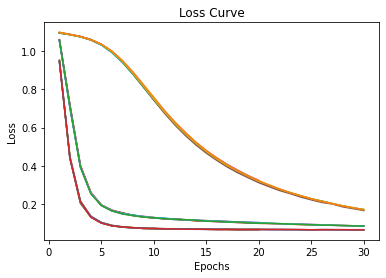

In [9]:
# Suppress output
import contextlib
import matplotlib
matplotlib.use('Agg')
with contextlib.redirect_stdout(open('/dev/null', 'w')):

    epochs_list = [20, 30]
    hidden_dim_list = [64, 128]
    num_layers_list = [3, 4]
    learning_rate_list = [0.0001, 0.001, 0.01]

    result_list = []

    for epochs in epochs_list:
        for hidden_dim in hidden_dim_list:
            for num_layers in num_layers_list:
                for learning_rate in learning_rate_list:
                    model, vectorizer = train_lstm(text_data, labels, epochs, hidden_dim, num_layers, learning_rate)
                    accuracy, roc_auc, report = evaluate_lstm(model, vectorizer, text_data, labels)
                    accuracy_mt, roc_auc_mt, report_mt = evaluate_lstm(model, vectorizer, text_data_mt, labels_mt)
                    accuracy_rw, roc_auc_rw, report_rw = evaluate_lstm(model, vectorizer, text_data_rw, labels_rw)
                    report['roc_auc'] = roc_auc
                    report_mt['roc_auc'] = roc_auc_mt
                    report_rw['roc_auc'] = roc_auc_rw
                    result = dict()
                    result['model'] = {'type': 'LSTM', 'epochs': epochs, 'hidden_dim': hidden_dim, 'num_layers': num_layers, 'learning_rate': learning_rate}
                    result['train'] = report
                    result['devtest_mt'] = report_mt
                    result['devtest_rw'] = report_rw
                    result_list.append(result)



We will write the results of the experiments in a json file, where each entry looks like the following:
    
    ```json
    {
        "model": {
            "type": [model_type],
            "hidden_dim": [hidden_dim],
            "num_layers": [n_layers],
            "learning_rate": [lr],
        },
        "train": {
            "accuracy": [train_acc],
            "roc_auc": [train_roc_auc]
            "0": {
                "precision": [train_precision_0],
                "recall": [train_recall_0],
                "f1": [train_f1_0],
                "support": [train_support_0]
            },
            "1": {
                "precision": [train_precision_1],
                "recall": [train_recall_1],
                "f1": [train_f1_1],
                "support": [train_support_1]
            },
            "2": {
                "precision": [train_precision_2],
                "recall": [train_recall_2],
                "f1": [train_f1_2],
                "support": [train_support_2]
            }
        },
        "devtest_mt": {
            "accuracy": [devtest_mt_acc],
            "roc_auc": [devtest_mt_roc_auc]
            "0": {
                "precision": [devtest_mt_precision_0],
                "recall": [devtest_mt_recall_0],
                "f1": [devtest_mt_f1_0],
                "support": [devtest_mt_support_0]
            },
            "1": {
                "precision": [devtest_mt_precision_1],
                "recall": [devtest_mt_recall_1],
                "f1": [devtest_mt_f1_1],
                "support": [devtest_mt_support_1]
            },
            "2": {
                "precision": [devtest_mt_precision_2],
                "recall": [devtest_mt_recall_2],
                "f1": [devtest_mt_f1_2],
                "support": [devtest_mt_support_2]
            }
        },
        "devtest_rw": {
            "accuracy": [devtest_rw_acc],
            "roc_auc": [devtest_rw_roc_auc]
            "0": {
                "precision": [devtest_rw_precision_0],
                "recall": [devtest_rw_recall_0],
                "f1": [devtest_rw_f1_0],
                "support": [devtest_rw_support_0]
            },
            "1": {
                "precision": [devtest_rw_precision_1],
                "recall": [devtest_rw_recall_1],
                "f1": [devtest_rw_f1_1],
                "support": [devtest_rw_support_1]
            },
            "2": {
                "precision": [devtest_rw_precision_2],
                "recall": [devtest_rw_recall_2],
                "f1": [devtest_rw_f1_2],
                "support": [devtest_rw_support_2]
            }
        }
    }
    ```

In [10]:
with open('lstm_results.json', 'w') as f:
    json.dump(result_list, f, indent=4)